# Additional considerations are demonstrated in this section

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#Importing Path
path = r"C:\Users\abiya\01-2023 Instacart Basket Analysis"

In [3]:
# Importing the most updated dataframe
df_all = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', 'final_dataset.pkl'))

In [4]:
df_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'department_id',
       'prices', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'order_frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'low_order_flag', 'age_profile',
       'departments', 'income_profile', 'family_profile'],
      dtype='object')

In [5]:
df_all.shape

(32434212, 37)

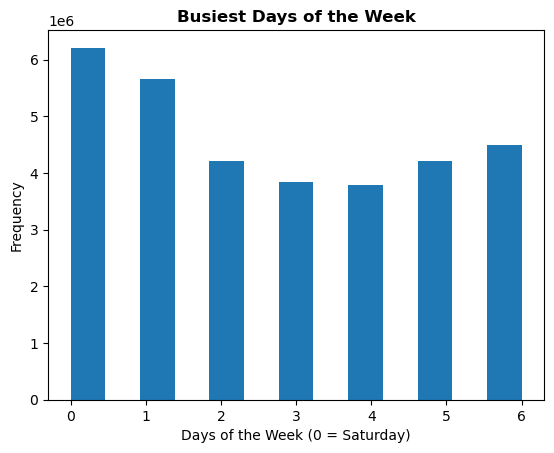

In [7]:
# Bar chart to show the busiest days of the week
busiest_days = df_all['order_dow'].plot.hist(bins = 13)
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.xlabel('Days of the Week (0 = Saturday)')
plt.show()

## Saturday and Sunday are observed to be the busiest days of the week

In [8]:
# Data to show total price spent according to the time of day
busiest_hours_price = df_all.groupby('order_hour_of_day').agg({'prices' : ['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_hours_price

,prices
,sum
order_hour_of_day,
11,33299960.2
10,32902007.2
15,32431604.5
16,31822625.6
14,31600468.1
12,31310019.3
13,30571285.5
9,28861862.4


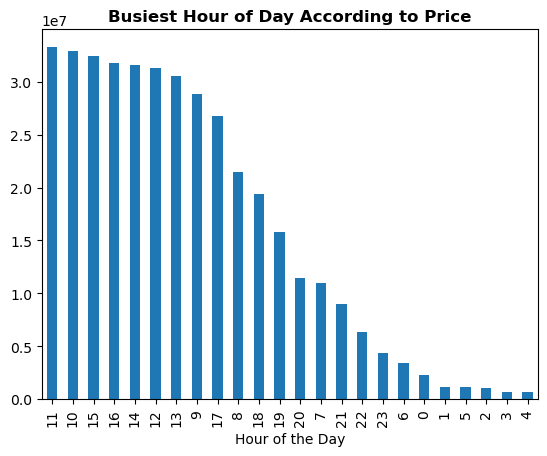

In [9]:
# Bar chart to show busiest hour of day according to the price
busiest_hours_price_bar = busiest_hours_price.plot.bar(legend = None)
plt.title('Busiest Hour of Day According to Price', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

## Based on the price, 11 is observed to be the busiest hour of the day.

In [10]:
busiest_hour_dept = df_all[df_all['order_hour_of_day'] == 11]

In [12]:
busiest_hour_dept['departments'].value_counts(dropna = False)

produce            796168
dairy eggs         453142
snacks             254676
beverages          234138
frozen             177325
pantry             161417
bakery              98480
canned goods        93032
deli                89341
dry goods pasta     72273
household           63906
meat seafood        60281
breakfast           59261
personal care       36758
babies              31896
international       23101
alcohol             13807
pets                 7879
missing              5809
other                2977
bulk                 2918
Name: departments, dtype: int64

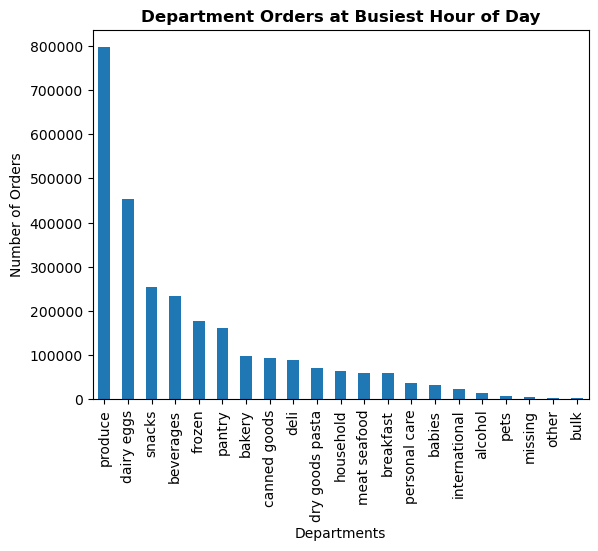

In [13]:
# Bar chart to show busiest hour of day by department
dept_count = busiest_hour_dept['departments'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar()
plt.title('Department Orders at Busiest Hour of Day', fontweight='bold')
plt.xlabel('Departments')
plt.ylabel('Number of Orders')
plt.show()

In [14]:
df_all['spending_flag'].value_counts(dropna = False)

Low spender     31798102
High spender      636110
Name: spending_flag, dtype: int64

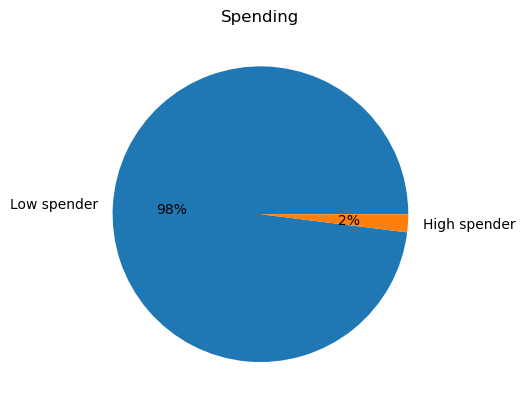

In [15]:
# Pie chart to show spending
spending_flag_pie = df_all['spending_flag'].value_counts(dropna = False).plot.pie(title = 'Spending', label = '', autopct = ('%1.f%%'))

In [17]:
df_all['departments'].value_counts(dropna = False)

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: departments, dtype: int64

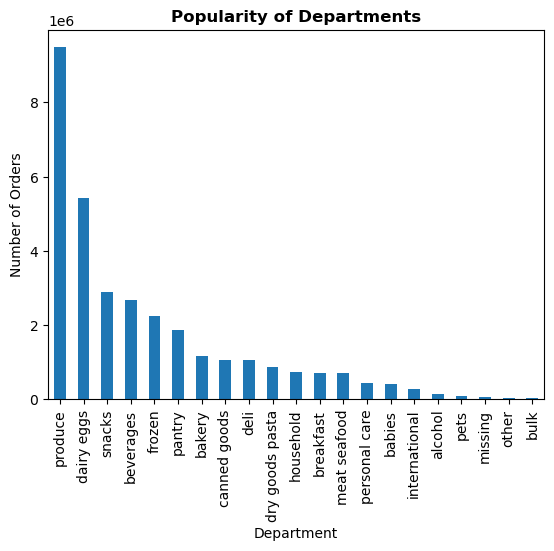

In [19]:
# Bar chart to show departments with the highest frequency of product orders
popular_dept_count = df_all['departments'].value_counts(dropna=False)
popular_dept = popular_dept_count.plot.bar()
plt.title('Popularity of Departments', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

## Distribution of users in regards to their brand loyalty is demonstrated as follows.

In [20]:
df_all['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        20554427
Regular customer          9175832
Non-frequent customer     2703953
Name: order_frequency_flag, dtype: int64

In [21]:
loyalty_freq = pd.crosstab(df_all['loyalty_flag'], df_all['order_frequency_flag'], dropna = False)

In [22]:
loyalty_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10289280,0,4457
New customer,1239024,2042055,2968319
Regular customer,9026123,661898,6203056


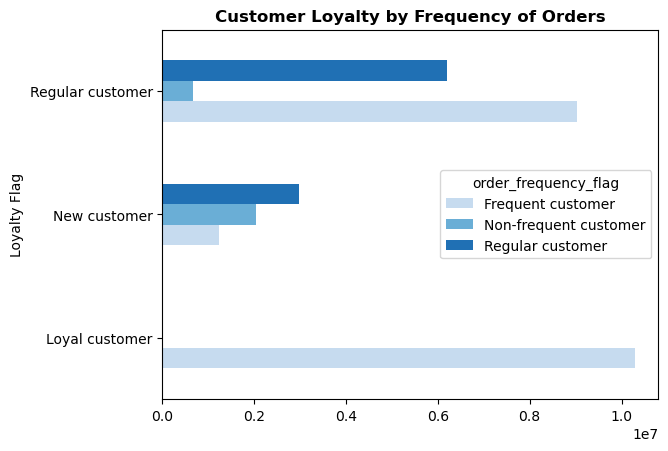

In [23]:
# Bar chart to show customer loyalty by frequency of orders
loyalty_freq_bar = loyalty_freq.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Customer Loyalty by Frequency of Orders', fontweight = 'bold')
plt.ylabel('Loyalty Flag')
plt.show()

In [24]:
# Checking differences in ordering habits based on a customer’s loyalty status
df_all['loyalty_flag'].value_counts(dropna = False)

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

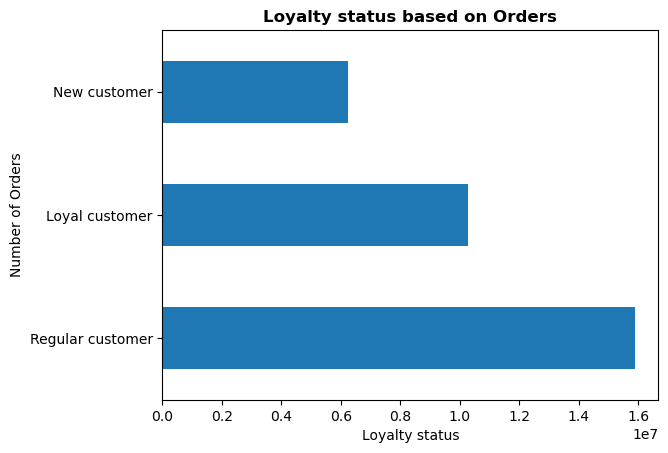

In [25]:
# Bar chart to show loyalty status
loyalty_status = df_all['loyalty_flag'].value_counts(dropna=False)
loyalty_status_habits = loyalty_status.plot.barh()
plt.title('Loyalty status based on Orders', fontweight='bold')
plt.xlabel('Loyalty status')
plt.ylabel('Number of Orders')
plt.show()

## Regular customers observed as the ones who order the most

In [26]:
# Checking differences in ordering habits based on a customer’s region
df_all['region'].value_counts(dropna = False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

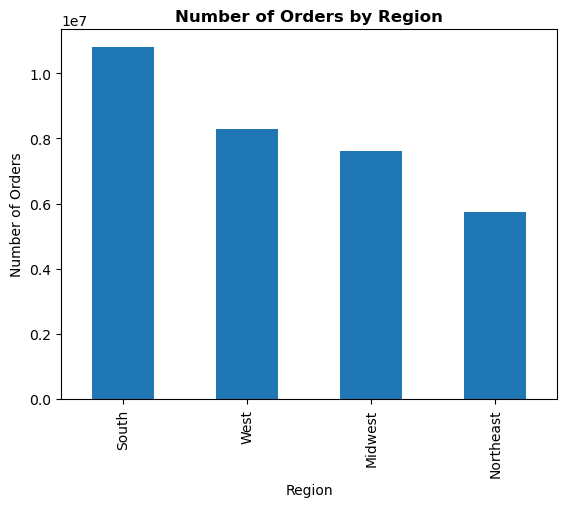

In [27]:
# Bar chart to show number of orders broken down by regions
region_orders_count = df_all['region'].value_counts(dropna=False)
region_orders = region_orders_count.plot.bar()
plt.title('Number of Orders by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()

## The South region has observed having the highest number of orders.

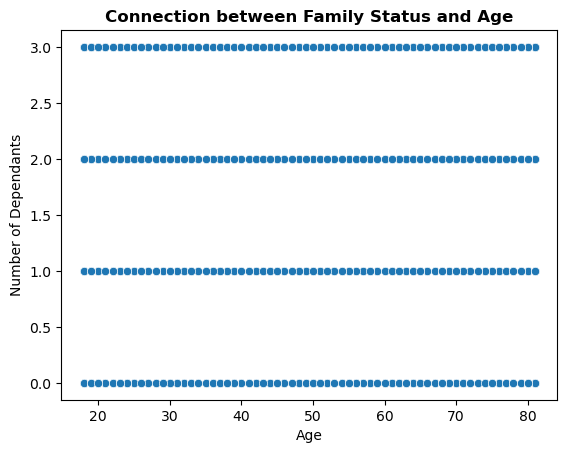

In [29]:
# Checking connection between age and family status in terms of ordering habits
#scatterplot for family status and age
age_family = sns.scatterplot(x = 'age', y = 'number_dependants',data = df_all)
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.title('Connection between Family Status and Age', fontweight = 'bold')
plt.show()

## Exporting visualizations 

In [30]:
busiest_days.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'busiest_day_of_week.png'))

In [34]:
busiest_hours_price_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'busiest_hours_price_bar.png'))

In [35]:
busiest_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'busiest_dept.png'))

In [36]:
spending_flag_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spending_flag_pie.png'))

In [37]:
popular_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'popular_dept.png'))

In [38]:
loyalty_freq_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_freq_distribution.png'))

In [39]:
loyalty_status_habits.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_status_habits.png'))

In [40]:
region_orders.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_orders.png'))

In [41]:
age_family.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_family.png'))

# Project Completed

## Thank You!